## Twitter Sentiment Aanalysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from textblob import TextBlob
from tqdm import tqdm
from scipy import stats as stat
import re
import string
import nltk
import warnings
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Bitcoin_tweets.csv", low_memory=False, sep=',')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [3]:
# droping nan values
df.dropna(subset=['hashtags'], inplace=True)


In [4]:
# add a new column called label
#df["label"] = "0"


In [5]:
# get only texts
df = df[['date','text']]

In [6]:
df.columns = ['date','tweet']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1216000 entries, 0 to 1232808
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   date    1216000 non-null  object
 1   tweet   1216000 non-null  object
dtypes: object(2)
memory usage: 27.8+ MB


In [8]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words(['english'])


print(stop_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ronal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ronal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ronal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

def cleaning(data):
  #remove urls
    tweet_without_url = re.sub(r'http\S+',' ', data)

  #remove hashtags
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

  #3. Remove mentions and characters that not in the English alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)
    
    #3. Remove Puncs
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    #6. Joining
    return " ".join(text_cleaned)

In [11]:
df['cleaned_tweets'] = df['tweet'].apply(cleaning)
df.head()

,date,tweet,cleaned_tweets
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank share halted NYSE ATM announce...
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",Today Take friend expe
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,BTC A big chance billion Price
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,This network secured node today Soon biggest b...
5,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,Trade Enjoy Trading fee Sign link


In [12]:
# get subjectivity
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

df['subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['polarity'] = df['cleaned_tweets'].apply(getPolarity)
df.head()

,date,tweet,cleaned_tweets,subjectivity,polarity
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank share halted NYSE ATM announce...,0.1,0.00
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",Today Take friend expe,0.0,0.00
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,BTC A big chance billion Price,0.1,0.00
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,This network secured node today Soon biggest b...,0.2,-0.25
5,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,Trade Enjoy Trading fee Sign link,0.5,0.40


In [14]:
# get the sentiment score
def getSentiment(score):
    if score < 0:
        return "Neg"
    elif score == 0:
        return "Neu"
    else:
        return "Pos"


In [15]:
# store text sentiment in a column

df['sentiment'] = df['polarity'].apply(getSentiment)

# show the data
df.head()

,date,tweet,cleaned_tweets,subjectivity,polarity,sentiment
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank share halted NYSE ATM announce...,0.1,0.00,Neu
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",Today Take friend expe,0.0,0.00,Neu
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,BTC A big chance billion Price,0.1,0.00,Neu
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,This network secured node today Soon biggest b...,0.2,-0.25,Neg
5,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,Trade Enjoy Trading fee Sign link,0.5,0.40,Pos


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1216000 entries, 0 to 1232808
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            1216000 non-null  object 
 1   tweet           1216000 non-null  object 
 2   cleaned_tweets  1216000 non-null  object 
 3   subjectivity    1216000 non-null  float64
 4   polarity        1216000 non-null  int64  
 5   sentiment       1216000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 64.9+ MB


In [24]:
def conv_to_int(val):
    if isinstance(val, str):
        return 0
    else:
        return int(val)
df["polarity"]=df["polarity"].apply(lambda x : conv_to_int(x))

## Visualize the data

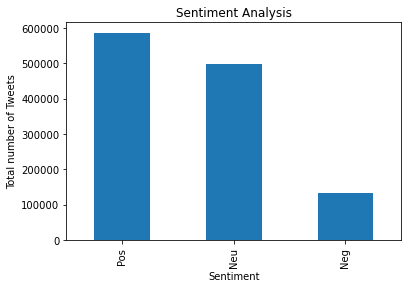

In [16]:
# plot a bar chart for the scores

df['sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Total number of Tweets')
plt.show()


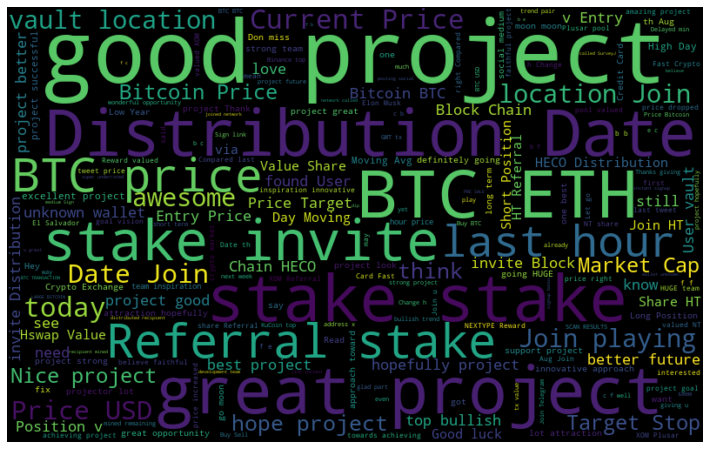

In [17]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['cleaned_tweets']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

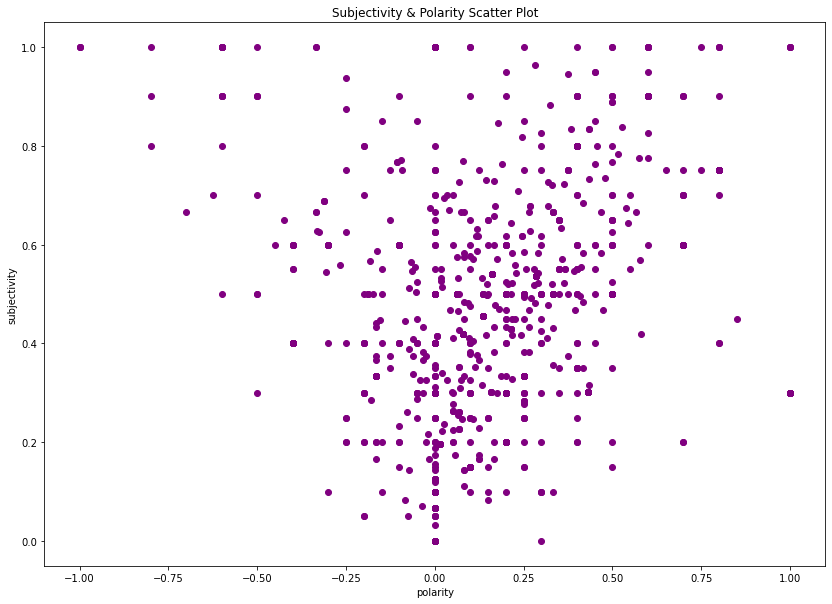

In [18]:
# create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(14,10))

for i in range(0, 2000):
    plt.scatter(df["polarity"].iloc[[i]].values[0], df["subjectivity"].iloc[[i]].values[0], color="Purple")

plt.title("Subjectivity & Polarity Scatter Plot")
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

## Modeling

In [26]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['cleaned_tweets'])

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['polarity'], random_state=42, test_size=0.25)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [29]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\ronal\anaconda3\envs\main\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
# testing
#pred = model.predict(x_test)
#f1_score(y_test, pred)